<a href="https://colab.research.google.com/github/Sai-Prathik/Neural-Networks/blob/main/Sample_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [266]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


In [312]:
data=pd.read_csv("/content/drive/MyDrive/ML Pandas Assignment/Datasets/Advertising.csv")
data.drop("Unnamed: 0",inplace=True,axis=1)
data

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [313]:
def minmaxscaler(data,range):
  scaler=MinMaxScaler(feature_range=range)
  scaler.fit(data)
  return scaler.transform(data)

In [314]:
data[["TV","radio","newspaper"]]=minmaxscaler(data[["TV","radio","newspaper"]],(-1,1))
data["sales"]=(data["sales"]-data["sales"].min())/(data["sales"].max()-data["sales"].min())

In [315]:
data

,TV,radio,newspaper,sales
0,0.551573,0.524194,0.211961,0.807087
1,-0.703754,0.584677,-0.211961,0.346457
2,-0.888400,0.850806,0.213720,0.303150
3,0.019953,0.665323,0.023747,0.665354
4,0.218126,-0.564516,0.021988,0.444882
...,...,...,...,...
195,-0.746365,-0.850806,-0.762533,0.236220
196,-0.367602,-0.802419,-0.862797,0.318898
197,0.192425,-0.625000,-0.892700,0.440945
198,0.913426,0.693548,0.159191,0.940945


In [318]:
def randomise(X, y):
    if len(X) != len(y):
        print("Input arguments are of different lengths")
    pairs = []
    for _ in range(len(X)):
        pairs.append((X[_], y[_]))

    random.shuffle(pairs)
    
    rand_X = []
    rand_y = []
    for i,j in pairs:
        rand_X.append(i)
        rand_y.append(j)

    return rand_X, rand_y

In [40]:
def init_weights(n,k):
  l=[]
  for i in range(k):
   l.append(np.random.uniform(-1,1,n))
  return np.array(l)
  

In [298]:
def get_diagonal_vec(n,x):#diagonal vector
  #print("get_digonal_vec")
  a=np.zeros((n,n),float) 
  np.fill_diagonal(a,x)
  return a

In [299]:
def get_multiples(model): #v(z(1-z))
  #print("get_multiples")
  #print(model.b2)
  x1=np.dot(get_diagonal_vec(3,model.h1),(1-model.h1))
  y1=np.dot(get_diagonal_vec(3,model.w2),x1)
  return y1

In [300]:
def backtrack_error(model,X,e):
    #print("backtrack_error")
    cm=get_multiples(model)
     
    bias_vec=cm #biases(3X1)
    l=[]
    for i in cm:
       l.append(i*X)
       
    hidden_weights=np.array(l)#hidden weights(3X3)
     
    output_weights=model.h1 #output weights(3X1)
    
    #print(hidden_weights.shape,output_weights.shape)
    #print(model.h1,e)
    model.w1=model.w1-(model.lr_rate*(hidden_weights*e))
    model.w2=model.w2-(model.lr_rate*(output_weights*e))
    model.b1=model.b1-(model.lr_rate*(bias_vec*e))
    model.b2=model.b2-(model.lr_rate*e)
     
     

In [ ]:
def randomize_data(data):

In [340]:
class FeedForward:
  def __init__(self,n_inputs,n_neurons,lr_rate):
    self.w1=init_weights(n_inputs,n_neurons)
    self.w2=init_weights(1,n_neurons)
    self.b1=init_weights(1,n_neurons)
    self.b2=init_weights(1,1)
    self.lr_rate=lr_rate
    self.h1=None
    self.h2=None
  
  def sigmoid(self,X):
     
    return 1/(1+np.exp(-X))

  def calc(self,X):
     
    self.h1=model.sigmoid(np.dot(self.w1,X.reshape(-1,1))+self.b1)
    self.h2=np.dot(self.w2.T,self.h1)+self.b2
     
    return self.h2

  def fit(self,X,y):
    
     l=[] 
     for i,j in zip(X,y):   
      e=self.calc(i)-j
      while e[0][0]>0.001 or e[0][0]<-0.001 :
        backtrack_error(self,i,e)
        e=self.calc(i)-j
      l.append(e)
     return np.array(l).reshape(-1,1).mean()
  
  def train_network(self,epoch,data):
    mean_error=[]
    for i in range(epoch):
      #data=randomize_data(data)
      data_x=np.array(data[["TV","radio","newspaper"]]) 
      data_y=np.array(data["sales"]).reshape(-1,1)
      me=self.fit(data_x,data_y)
      print("epoch"+str(i+1)+" "+str(me))
      mean_error.append(me)
    return np.array(mean_error)


     
   

       
       
        
     
      

In [343]:
np.random.seed(1)
model=FeedForward(3,3,0.01)
#model.fit(data_x,data_y)
mean_error=model.train_network(50,data).reshape(-1,1) 



epoch1 3.963809269521952e-05
epoch2 -4.168981198345849e-05
epoch3 -4.282566504098327e-05
epoch4 -5.179180557701411e-05
epoch5 -4.9784234172131e-05
epoch6 -5.146115058498067e-05
epoch7 -4.906547517070696e-05
epoch8 -2.745608262567388e-05
epoch9 -2.8118128477516922e-05
epoch10 -6.231219823892228e-06
epoch11 7.547324158295246e-06
epoch12 -8.3729326118364e-06
epoch13 3.5083058757435363e-06
epoch14 -1.4622885556455495e-06
epoch15 -3.441842382439352e-05
epoch16 -3.027679099472623e-05
epoch17 -3.129786307285824e-05
epoch18 -2.01398874237773e-05
epoch19 -1.498203094693111e-05
epoch20 -2.204059882989211e-05
epoch21 -6.927758757483346e-06
epoch22 -5.323030448919838e-06
epoch23 -1.0416903335265168e-05
epoch24 -4.736900074580538e-06
epoch25 -6.993277964711317e-06
epoch26 -3.7710630472886223e-06
epoch27 1.0890255700440956e-05
epoch28 -4.4704520370690557e-07
epoch29 -4.033492461001306e-06
epoch30 -3.24463015182401e-06
epoch31 -7.077051595887826e-06
epoch32 -1.1166407134440212e-05
epoch33 7.530739643

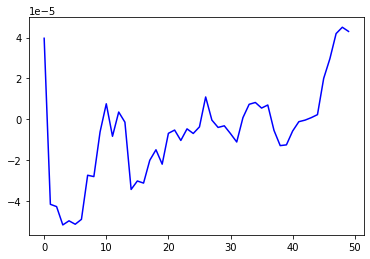

In [344]:
x=np.arange(0,mean_error.size)
plt.plot(x,mean_error,color="blue")

Error Reduction of a single data point


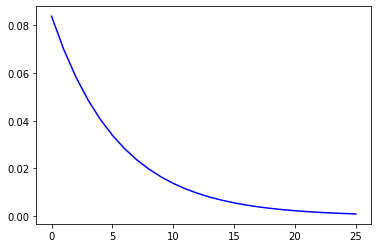

In [290]:
np.random.seed(1)

model=FeedForward(3,3,0.1)
#model.fit(data_x,data_y)
y=model.fit(data_x[2],data_y[2]).reshape(-1,1) 
x=np.arange(0,y.size)
plt.plot(x,y,color='blue')

In [252]:
def backtrack_error(model,X,e):
    #print("backtrack_error")
    cm=get_multiples(model)
     
    bias_vec=cm #biases(3X1)
     
    l=[]
    for i in cm:
      #print(i*X)
       
      l.append(i*X)
       
     
     
     
    hidden_weights=np.array(l)#hidden weights(3X3)
     
    output_weights=model.h1 #output weights(3X1)
    
    #print(hidden_weights.shape,output_weights.shape)
    #print(model.h1,e)
    model.w1=model.w1-(model.lr_rate*(hidden_weights*e))
    model.w2=model.w2-(model.lr_rate*(output_weights*e))
    model.b1=model.b1-(model.lr_rate*(bias_vec*e))
    model.b2=model.b2-(model.lr_rate*e)
     
     